# CNN deep network on mnist data
## Yuankai Huo @ Vandebrilt University  11/26/2016

In [1]:
import mnist_cnn as cnn
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline
print ("=== PACKAGES LOADED ===")

=== PACKAGES LOADED ===


In [2]:
mnist = input_data.read_data_sets('data/', one_hot=True)
print ("=== MNIST READY ===")

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
=== MNIST READY ===


## Specify how many epochs for training and design the graph 

In [3]:
training_epochs = 1
weights,biases = cnn.variable_init()
cost,optm,accr,sess,_corr = cnn.init_graph(weights,biases)

# PART 1: Classifier on original data

## 1.1 Visualize original training images

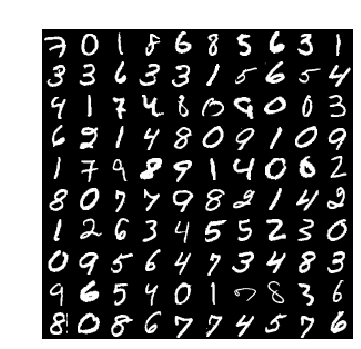

In [4]:
expriment1 = {'add_gaussian_noise':0 , 'add_label_noise':0}
trainimg, trainlabel, testimg, testlabel, cnn_file_name = cnn.init_expr(mnist,expriment1)
cnn.show_trainimg(trainimg,sess,weights,biases)

## 1.2 Training the CNN deep network
### The CNN in this experiment is derived from my favorate tensorflow resource 
### https://github.com/sjchoi86/Tensorflow-101

In [5]:
sess,accr = cnn.train_net(trainimg,trainlabel,cnn_file_name,training_epochs,cost,optm,accr,sess)

=== CNN TRAINING START ===
 loading already trained network from file /share3/huoy1/Deeplearning/mnist/mnist_YH-master/mnist_cnn.ckpt-0
=== CNN TRAINING LOADED ===


## 1.3 Testing the CNN deep network

In [6]:
test_acc = cnn.test_net(testimg,testlabel,sess,accr)

=== CNN TESTING START ===
 TEST ACCURACY: 0.96260
=== CNN TESTING FINISHED ===


## 1.4 Q&A
### Q1: What is your test set error rate?
A1: The test set error rate for entire 10000 mnist is: 

In [7]:
print('test error rate is %.05f' % (1-test_acc))

test error rate is 0.03740


### Q2: What is the test set error rate for each class? Are some classes more challenging than others to distinguish from each other? Why?
A2: The test error rate for 10 classes (0 to 9), are shown below. Some classes are more challenging than others, such as "3", "7", "9". The reason is that those digits have similar apperance as other digitss, e.g., "1" and "7" are confused, "4" and "9" are confused, "3" and "8" are confused etc.

In [8]:
test_acc_each_class = cnn.test_net_each_class(testimg,testlabel,sess,_corr)

=== CNN TESTING EACH CLASS START ===
 TEST ERROR RATE: 0.01224 FOR CLASS DIGIT 0 [size=980]
 TEST ERROR RATE: 0.01233 FOR CLASS DIGIT 1 [size=1135]
 TEST ERROR RATE: 0.05039 FOR CLASS DIGIT 2 [size=1032]
 TEST ERROR RATE: 0.06832 FOR CLASS DIGIT 3 [size=1010]
 TEST ERROR RATE: 0.03259 FOR CLASS DIGIT 4 [size=982]
 TEST ERROR RATE: 0.00897 FOR CLASS DIGIT 5 [size=892]
 TEST ERROR RATE: 0.03132 FOR CLASS DIGIT 6 [size=958]
 TEST ERROR RATE: 0.06226 FOR CLASS DIGIT 7 [size=1028]
 TEST ERROR RATE: 0.04107 FOR CLASS DIGIT 8 [size=974]
 TEST ERROR RATE: 0.05253 FOR CLASS DIGIT 9 [size=1009]
=== CNN TESTING EACH CLASS FINISHED ===


### Q3: Based only on information gathered in the first epoch of training, do you think that the model would benefit from more training time? Why?
A3: In ths CNN network, the model would benefit from more training time based on the first epoch. The reason is that once you check the average cost, which is cross entropy of the result after applying the softmax function, the cost can be further optimized.The results can tell us the test error rate decreases from 0.037 after epoch 1 to 0.008 after epoch 15.

### Q4: Besides training for a longer time, what would you do to improve accuracy?
A4: Many ways can be tried to improve the performance. My discussion is not limited on the mnist since the accuracy is already 99.2%. In generally, we can (1) Rescale/Normalize the data, (2) Preprocess the data using PCA, (3) Perform pa4rameter tuning if using the same CNN, (4) Try other deep networks, (5) Even combine with other machine learning methods if you find some interesting features using "human intellegence".

# PART 2: Added image noise

## 2.1 Add guassian noise with mu=0, std=8

--- Add gaussian noise mu=0 std=8 ---


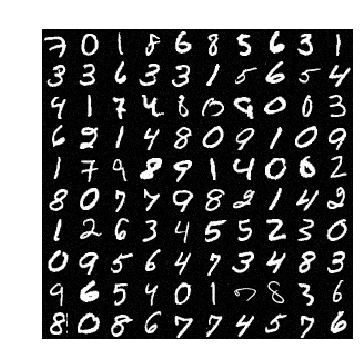

In [10]:
expriment2 = {'add_gaussian_noise':1 , 'add_label_noise':0, 'mu':0, 'std':8}
trainimg, trainlabel, testimg, testlabel, cnn_file_name = cnn.init_expr(mnist,expriment2)
cnn.show_trainimg(trainimg,sess,weights,biases)

In [11]:
mnist.train.images[0][1:10]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], dtype=float32)

In [12]:
trainimg[0][1:10]

array([ 0.        ,  0.0885636 ,  0.        ,  0.        ,  0.01158466,
        0.        ,  0.        ,  0.        ,  0.02370662], dtype=float32)

In [13]:
sess,accr = cnn.train_net(trainimg,trainlabel,cnn_file_name,training_epochs,cost,optm,accr,sess)
test_acc = cnn.test_net(testimg,testlabel,sess,accr)
print('test error rate is %.05f' % (1-test_acc))

=== CNN TRAINING START ===
 loading already trained network from file /share3/huoy1/Deeplearning/mnist/mnist_YH-master/mnist_gaussian_noise_mu0_std8.ckpt-0
=== CNN TRAINING LOADED ===
=== CNN TESTING START ===
 TEST ACCURACY: 0.95870
=== CNN TESTING FINISHED ===
test error rate is 0.04130


## 2.2 Add guassian noise with mu=0, std=32

--- Add gaussian noise mu=0 std=32 ---


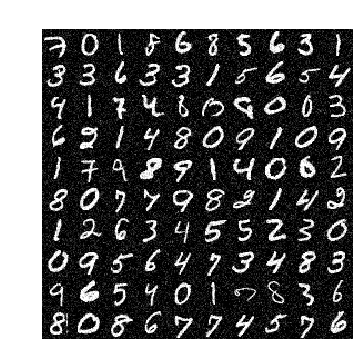

In [14]:
expriment3 = {'add_gaussian_noise':1 , 'add_label_noise':0, 'mu':0, 'std':32}
trainimg, trainlabel, testimg, testlabel, cnn_file_name = cnn.init_expr(mnist,expriment3)
cnn.show_trainimg(trainimg,sess,weights,biases)

In [15]:
sess,accr = cnn.train_net(trainimg,trainlabel,cnn_file_name,training_epochs,cost,optm,accr,sess)
test_acc = cnn.test_net(testimg,testlabel,sess,accr)
print('test error rate is %.05f' % (1-test_acc))

=== CNN TRAINING START ===
 loading already trained network from file /share3/huoy1/Deeplearning/mnist/mnist_YH-master/mnist_gaussian_noise_mu0_std32.ckpt-0
=== CNN TRAINING LOADED ===
=== CNN TESTING START ===
 TEST ACCURACY: 0.96270
=== CNN TESTING FINISHED ===
test error rate is 0.03730


## 2.3 Add guassian noise with mu=0, std=128

--- Add gaussian noise mu=0 std=128 ---


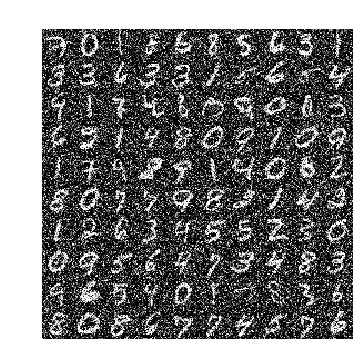

In [16]:
expriment4 = {'add_gaussian_noise':1 , 'add_label_noise':0, 'mu':0, 'std':128}
trainimg, trainlabel, testimg, testlabel, cnn_file_name = cnn.init_expr(mnist,expriment4)
cnn.show_trainimg(trainimg,sess,weights,biases)

In [17]:
sess,accr = cnn.train_net(trainimg,trainlabel,cnn_file_name,training_epochs,cost,optm,accr,sess)
test_acc = cnn.test_net(testimg,testlabel,sess,accr)

=== CNN TRAINING START ===
 loading already trained network from file /share3/huoy1/Deeplearning/mnist/mnist_YH-master/mnist_gaussian_noise_mu0_std128.ckpt-0
=== CNN TRAINING LOADED ===
=== CNN TESTING START ===
 TEST ACCURACY: 0.89830
=== CNN TESTING FINISHED ===


--- Add gaussian noise mu=0 std=256 ---


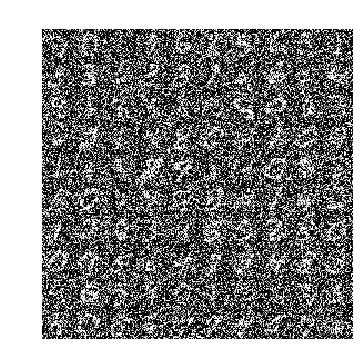

In [18]:
expriment0 = {'add_gaussian_noise':1 , 'add_label_noise':0, 'mu':0, 'std':256}
trainimg, trainlabel, testimg, testlabel, cnn_file_name = cnn.init_expr(mnist,expriment0)
cnn.show_trainimg(trainimg,sess,weights,biases)

In [19]:
sess,accr = cnn.train_net(trainimg,trainlabel,cnn_file_name,training_epochs,cost,optm,accr,sess)
test_acc = cnn.test_net(testimg,testlabel,sess,accr)

=== CNN TRAINING START ===
 loading already trained network from file /share3/huoy1/Deeplearning/mnist/mnist_YH-master/mnist_gaussian_noise_mu0_std256.ckpt-0
=== CNN TRAINING LOADED ===
=== CNN TESTING START ===
 TEST ACCURACY: 0.13880
=== CNN TESTING FINISHED ===


## 2.4 Q&A

### Q1: What are the implications of the dependence of accuracy on noise if you were to deploy a production classifier? How much noise do you think a production classifier could tolerate?
A1:Typically, the larger the noise is, the worse the accuracy will be. In this CNN, we can see that trend in the following image. I think the noise mu = 0, std < is acceptable with accuracy > 90%.

### Q2:Do you think that Gaussian noise is an appropriate model for real-world noise if the characters were acquired by standard digital photography? If so, in what situations? How would you compensate for it? 
A2: Gaussian noise is not suffcicent in the real world digital photography. For instance, thinking about the situation that the photos are taken by digital camera. The gaussian noise can simutate the random noise. However, we still need to simulate the fixed pattern noise (long exposure), banding noise (from camera hardware), motion noise (hand movment) etc. In those cases, kernal based smooth, low pass filter and motion correction preprocessing should be employed.

### Q3: Is the accuracy of certain classes affected more by image noise than others? Why?
A3:

# Part 3: Label noise

## 3.1 Apply 5% randomize on training labels

In [20]:
expriment5 = {'add_gaussian_noise':0, 'add_label_noise':1, 'label_random_rate':0.05}
trainimg, trainlabel, testimg, testlabel, cnn_file_name = cnn.init_expr(mnist,expriment5)
sess,accr = cnn.train_net(trainimg,trainlabel,cnn_file_name,training_epochs,cost,optm,accr,sess)
test_acc = cnn.test_net(testimg,testlabel,sess,accr)

--- Randomize 5.00 percent trainlabel  ---
=== CNN TRAINING START ===
 loading already trained network from file /share3/huoy1/Deeplearning/mnist/mnist_YH-master/mnist_label_noise_0.05.ckpt-0
=== CNN TRAINING LOADED ===
=== CNN TESTING START ===
 TEST ACCURACY: 0.85950
=== CNN TESTING FINISHED ===


## 3.2 Apply 15% randomize on training labels

In [21]:
expriment6 = {'add_gaussian_noise':0, 'add_label_noise':1, 'label_random_rate':0.15}
trainimg, trainlabel, testimg, testlabel, cnn_file_name = cnn.init_expr(mnist,expriment6)
sess,accr = cnn.train_net(trainimg,trainlabel,cnn_file_name,training_epochs,cost,optm,accr,sess)
test_acc = cnn.test_net(testimg,testlabel,sess,accr)

--- Randomize 15.00 percent trainlabel  ---
=== CNN TRAINING START ===
 loading already trained network from file /share3/huoy1/Deeplearning/mnist/mnist_YH-master/mnist_label_noise_0.15.ckpt-0
=== CNN TRAINING LOADED ===
=== CNN TESTING START ===
 TEST ACCURACY: 0.76520
=== CNN TESTING FINISHED ===


In [22]:
import tensorflow as tf
tf.get_collection(tf.GraphKeys.VARIABLES, scope='my scope')

[]

## 3.3 Apply 50% randomize on training labels

In [23]:
expriment7 = {'add_gaussian_noise':0, 'add_label_noise':1, 'label_random_rate':0.5}
trainimg, trainlabel, testimg, testlabel, cnn_file_name = cnn.init_expr(mnist,expriment7)
sess,accr = cnn.train_net(trainimg,trainlabel,cnn_file_name,training_epochs,cost,optm,accr,sess)
test_acc = cnn.test_net(testimg,testlabel,sess,accr)

--- Randomize 50.00 percent trainlabel  ---
=== CNN TRAINING START ===
 loading already trained network from file /share3/huoy1/Deeplearning/mnist/mnist_YH-master/mnist_label_noise_0.50.ckpt-0
=== CNN TRAINING LOADED ===
=== CNN TESTING START ===
 TEST ACCURACY: 0.19920
=== CNN TESTING FINISHED ===


## 3.4 Q&A

### Q1. How important are accurate training labels to classifier accuracy?

### Q2. How would you compensate for label noise? Assume you have a large budget available but you want to use it as efficiently as possible.
A1. We can first randomly visually check 1000 images and see the error rate. If the label noise is about or less, we can first do a automated classification using 10 fold cross validation. Then we can focus on those wrong prediction. Then repeat this procedure using corrected labels until satisfied. Another case is that the label noise is large, then I recommend to hire a person to relabel a amount which we can get accetaple accurarcy.

### Q3. How would you quantify the amount of label noise if you had a noisy data set?
A3. For the label noise, I will randomly check 1000 images visually.

### Q4.  If your real-world data had both image noise and label noise, which would you be more concerned about? Which is easier to compensate for?
A4. For medical image data, I would more concern about image noise because the quality/contrast is one of major limitations for automatic image processing algorithms. For the label noise, it is more easider to compensate as long as you have resources.